In [1]:
# 可视化我们的数据集
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
# 极简案例 - kneighbors_graph
'''
sklearn.neighbors.kneighbors_graph(X, 
                                   n_neighbors, 
                                   *, 
                                   mode='connectivity', 
                                   metric='minkowski', 
                                   p=2, 
                                   metric_params=None, 
                                   include_self=False, 
                                   n_jobs=None
                                  )
关键参数：
mode
如果为'connectivity'将返回具有1和0的连通性矩阵，如果为'distance'将根据给定的度量返回邻居之间的距离。

include_self
是否将每个样本标记为其自身的第一个最近邻居。
如果为'auto'，则将True用于mode ='connectivity'，将False用于mode ='distance'。

'''

X = [[0], [3], [1]]

from sklearn.neighbors import kneighbors_graph

A = kneighbors_graph(X,
                     n_neighbors = 2, 
                     mode='connectivity', 
                     include_self=False
                    )
A.toarray()




array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [12]:

# 极简案例 - radius_neighbors_graph
'''
sklearn.neighbors.kneighbors_graph(X, 
                                   radius, 
                                   *, 
                                   mode='connectivity', 
                                   metric='minkowski', 
                                   p=2, 
                                   metric_params=None, 
                                   include_self=False, 
                                   n_jobs=None
                                  )
关键参数：
radius
最大半径。

mode
如果为'connectivity'将返回具有1和0的连通性矩阵，如果为'distance'将根据给定的度量返回邻居之间的距离。

include_self
是否将每个样本标记为其自身的第一个最近邻居。
如果为'auto'，则将True用于mode ='connectivity'，将False用于mode ='distance'。

'''

X = [[0], [3], [1]]

from sklearn.neighbors import radius_neighbors_graph
A = radius_neighbors_graph(X, 
                           1.5, 
                           mode='connectivity',
                           include_self=False
                          )
A.toarray()


array([[0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [13]:


# 先构建一个简单的构建数据集
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import kneighbors_graph

# 构建一个连续特征的数据集，构建几个男嘉宾，维度为：身高、颜值、财力、人品为数据集的特征，看看哪几个能分为一个群组
X = np.array([[7,        7,        9,        3],
              [5,        4,        5,        6],
              [8,        6,        9,        3],
              [9,        9,        7,        7],
              [5,        5,        5,        5],
              [9,        9,        9,        1],
              [5,        2,        5,        5],
              [8,        2,        7,        6],
              [1,        8,        7,        4],
              [4,        3,        7,        8],
              [8,        1,        7,        6]
              ])
              
#计算近邻矩阵
A = kneighbors_graph(X,
                     4,
                     mode='connectivity', 
                     include_self=False
                    )
A.toarray()

# 矩阵格式转换成图格式
G = nx.from_numpy_matrix(A.toarray())

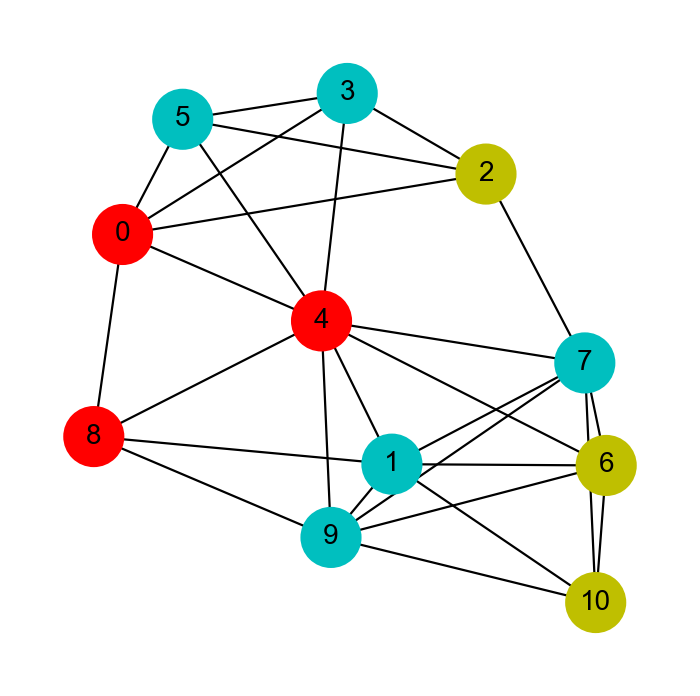

In [14]:



# 生成的近邻图进行可视化
# 颜色设置
colors = ['r','c','y','c']*6
colors = colors[0:len(G.nodes())]

#使用kamada_kawai_layout布局
plt.figure(figsize=(2,2),dpi=200)
nx.draw_networkx(G,
                 pos = nx.kamada_kawai_layout(G),
                 node_color = colors,
                 node_size=100,
                 font_size = 5,
                 width=0.4,
                 alpha=1
                 )
plt.axis('off')  
plt.show()

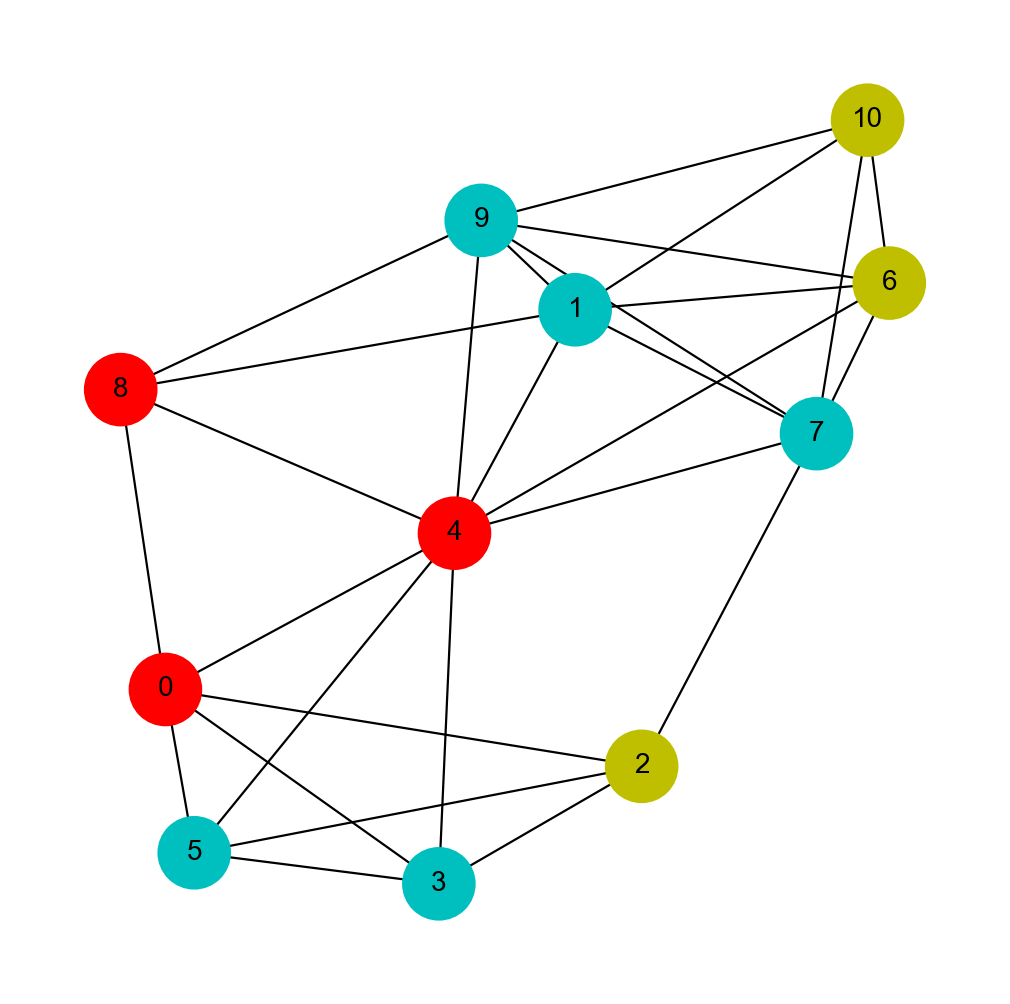

In [15]:

# 使用 spring_layout 布局
plt.figure(figsize=(3,3),dpi=200)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size = 150,
                 font_size = 5,
                 alpha = 1,
                 width = 0.4
                 )
plt.axis('off')
plt.show()


In [16]:


# 限制-半径近邻图
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import radius_neighbors_graph

# 数据准备
X = np.array([[7,        7,        9,        3],
              [5,        4,        5,        6],
              [8,        6,        9,        3],
              [9,        9,        7,        7],
              [5,        5,        5,        5],
              [9,        9,        9,        1],
              [5,        2,        5,        5],
              [8,        2,        7,        6],
              [1,        8,        7,        4],
              [4,        3,        7,        8],
              [8,        1,        7,        6]
              ])

# 限制半径近邻图矩阵
A = radius_neighbors_graph(X, 
                           radius = 2, # 限制距离，不要超过4
                           mode ='connectivity', 
                           include_self=False
                          )
A.toarray()

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

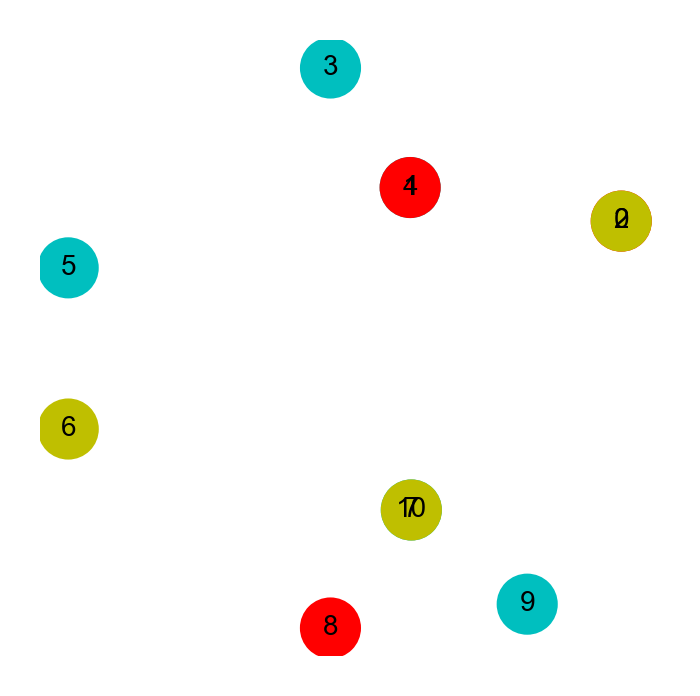

In [17]:


# 矩阵格式转换成图格式
G = nx.from_numpy_matrix(A.toarray())


# 颜色设置
colors = ['r','c','y','c']*6
colors = colors[0:len(G.nodes())]

#使用kamada_kawai_layout布局
plt.figure(figsize=(2,2),dpi=200)
nx.draw_networkx(G,
                 pos = nx.kamada_kawai_layout(G),
                 node_color = colors,
                 node_size=100,
                 font_size = 5,
                 width=0.4,
                 alpha=1
                 )
plt.axis('off')  
plt.show()

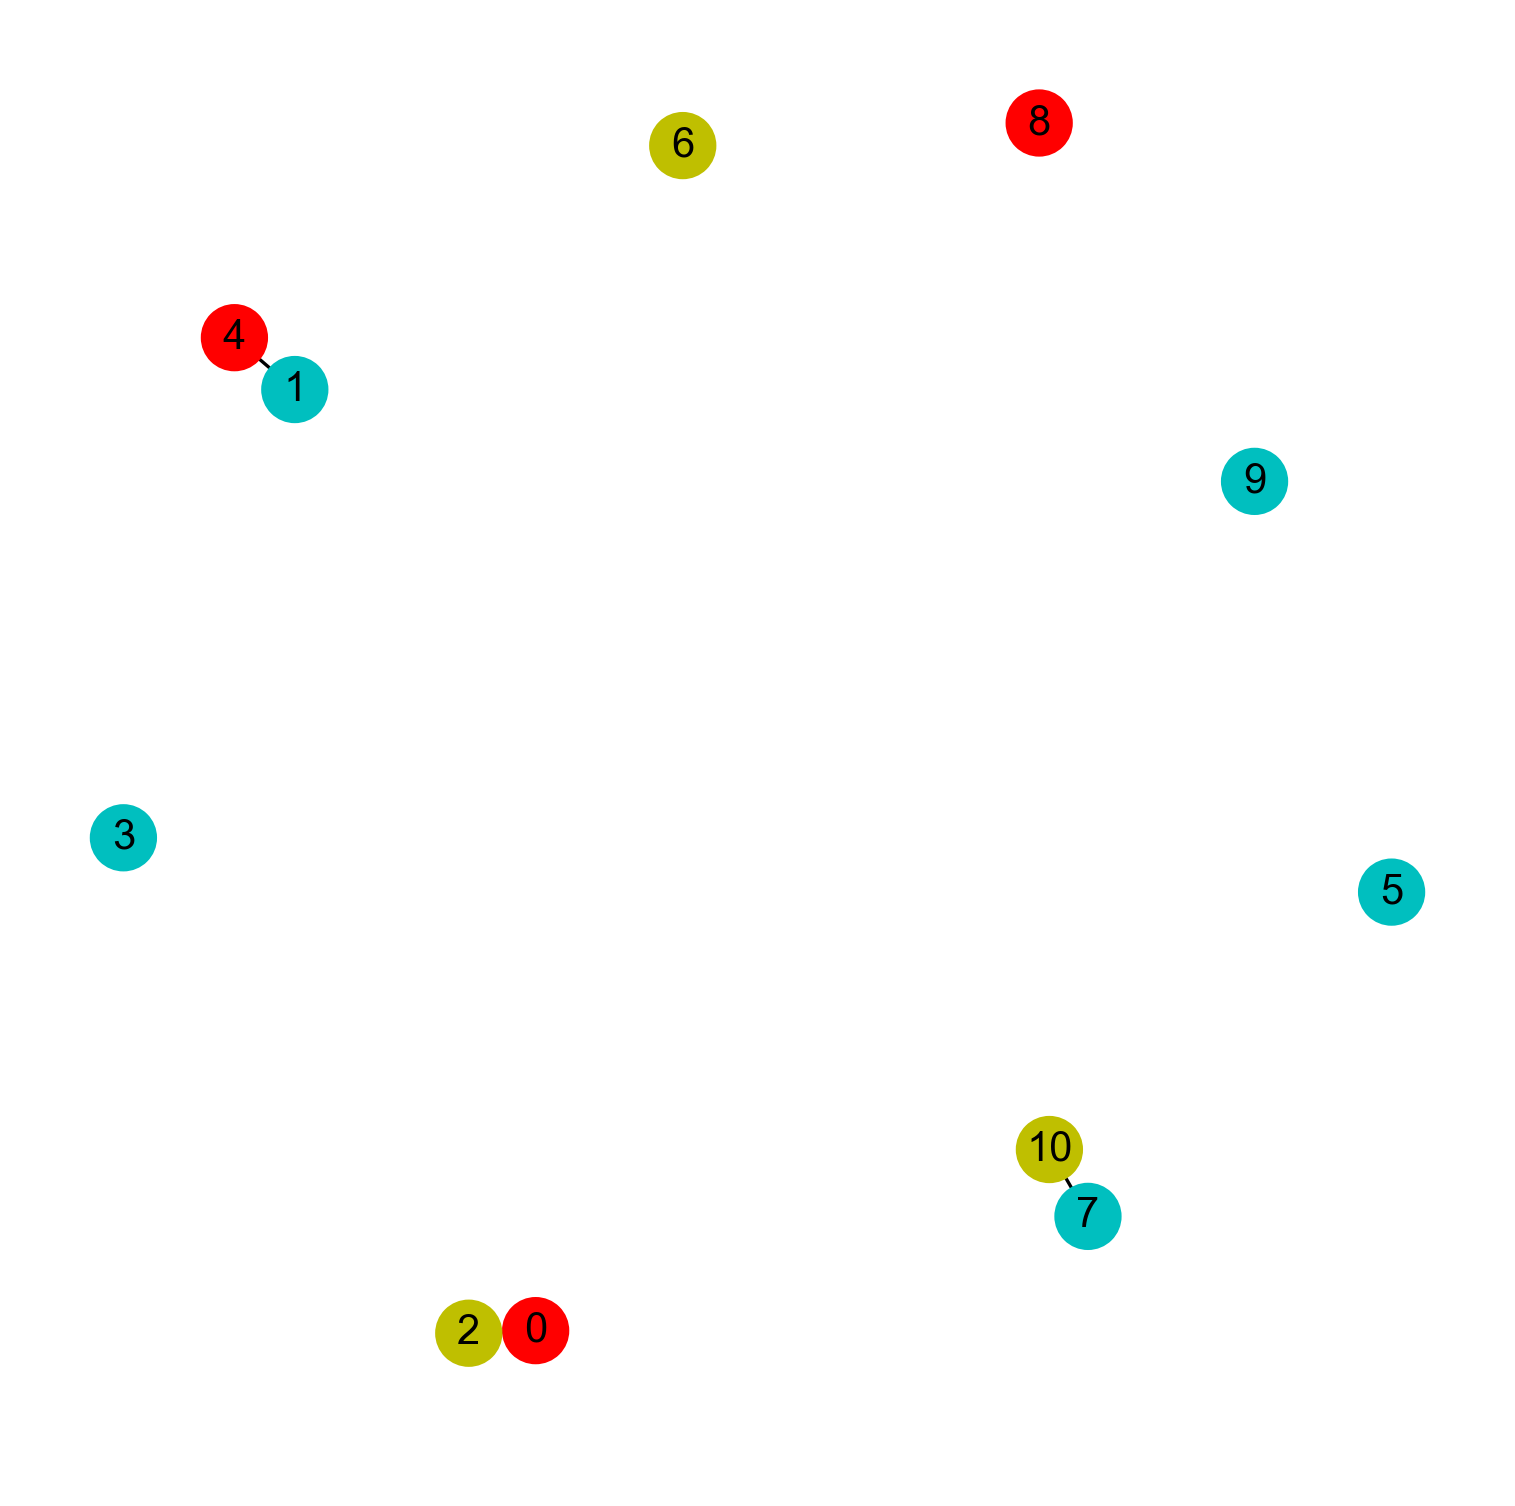

In [18]:


# 使用 spring_layout 布局
plt.figure(figsize=(3,3),dpi=300)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size = 50,
                 font_size = 5,
                 alpha = 1,
                 width = 0.4
                 )
plt.axis('off')
plt.show()



In [19]:



import pandas as pd
# 找到所有连通子图
com = list(nx.connected_components(G))

# 打印看看什么格式的，可以看到得到的结果为列表-字典格式
print(com)

# 将 列表-字典 整理成数据表格形式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'user_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 查看数据结果
df_com

[{0, 2}, {1, 4}, {3}, {5}, {6}, {10, 7}, {8}, {9}]


,group_id,user_id
0,0,0
1,0,2
0,1,1
1,1,4
0,2,3
0,3,5
0,4,6
0,5,10
1,5,7
0,6,8


In [20]:







##### 用这个scipy库的极大连通子图算法，就不用转换了，结果本来就是稀疏矩阵了

from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

n_components, labels = connected_components(csgraph  = A, 
                                            directed = False, 
                                            connection = 'weak', 
                                            return_labels = True
                                           )
print(n_components)
print(labels)



# 结果整理
df_com = pd.DataFrame(X)
df_com['group_id'] = labels

df_com.sort_values(by = 'group_id')

8
[0 1 0 2 1 3 4 5 6 7 5]


,0,1,2,3,group_id
0,7,7,9,3,0
2,8,6,9,3,0
1,5,4,5,6,1
4,5,5,5,5,1
3,9,9,7,7,2
5,9,9,9,1,3
6,5,2,5,5,4
7,8,2,7,6,5
10,8,1,7,6,5
8,1,8,7,4,6


## 评论内容

In [21]:
#加载所需要的包
import pandas as pd
import os 
from   sklearn.feature_extraction.text import TfidfVectorizer

'''
数据我上传到作业了，也可以看看下面的网址，多年前的一个比赛题，我们不用传统的方法做
评论团伙挖掘
数据地址：https://tianchi.aliyun.com/dataset/dataDetail?dataId=129832
比赛地址：https://www.datafountain.cn/competitions/370
'''

#读取数据
os.chdir('/Users/zhusx/Desktop/kaggle_dataset/risk_contral/goutu')
train = pd.read_csv('train.csv',sep='\t')

train.head(100)




#查看数据大小和形状
print(train.shape)


#查看0-1的比例,可以看出来，数据集不怎么平衡
print(train['label'].value_counts())
 

(10000, 2)
0    8489
1    1511
Name: label, dtype: int64


In [22]:

# 结巴分词-测试
import jieba
jieba.lcut('小伍哥全宇宙最帅')



#进行分字处理 用结巴分词
data = train['comment'].apply(lambda x:' '.join(jieba.lcut(x)))

In [23]:
data

0                             一如既往 地 好吃 ， 希望 可以 开 到 其他 城市
1                             味道 很 不错 ， 分量 足 ， 客人 很多 ， 满意
2       下雨天 来 的 ， 没有 想象 中 那么 火爆 。 环境 非常 干净 ， 古色古香 的 ， ...
3                                 真心 不 好吃   基本上 没 得 好多 味道
4       少送 一个 牛肉 汉堡   而且 也 不 好吃   特别 是 鸡肉 卷   * * 都 不想...
                              ...                        
9995                                    有 小 蟑螂 ， 太 不 卫生 了
9996                                      不太 好吃   没 以前 好吃
9997    这是 我们 聚餐 的 首选 啊 ， 价钱 实惠 服务 也 很 好 ！ 环境 也 还 可以 ，...
9998                菜品 味道 很 不错 就是 有 冷 的 ， 服务态度 很 好 ， 酒 很棒
9999                      汤 很浓 ， 凉菜 味道 好 ， 鸡量 足 ， 服务 也 可以
Name: comment, Length: 10000, dtype: object

In [24]:


# 看看前几条分词的结果
for i in data.head(20):
    print(i)
    
    
# 进行向量转化 tf-idf
vectorizer_word = TfidfVectorizer(max_features=20000,
                             token_pattern=r"(?u)\b\w+\b",     
                             min_df = 5, 
                             analyzer='word', 
                             ngram_range=(1,2)
                             )
vectorizer_word = vectorizer_word.fit(data)
tfidf_matrix    = vectorizer_word.transform(data)


#查看词典的大小
print(len(vectorizer_word.vocabulary_))


#查看词典里面的词-部分词语
vectorizer_word.vocabulary_

一如既往 地 好吃 ， 希望 可以 开 到 其他 城市
味道 很 不错 ， 分量 足 ， 客人 很多 ， 满意
下雨天 来 的 ， 没有 想象 中 那么 火爆 。 环境 非常 干净 ， 古色古香 的 ， 我 自己 也 是 个 做 服务行业 的 ， 我 都 觉得 他们 的 服务 非常 好 ， 场地 脏 了 马上 就 有 阿姨 打扫 。
真心 不 好吃   基本上 没 得 好多 味道
少送 一个 牛肉 汉堡   而且 也 不 好吃   特别 是 鸡肉 卷   * * 都 不想 评论 了   谁 买 谁 知道
用美团 ， 图 打折 。
好难 吃水 煮 鸡杂 呀
环境 很 好 ， 服务 很 热情 ， 味道 非常 好 ， 鱼 也 很 新鲜 ， 我 和 儿子 吃 的 好 饱 ， 包子 和 饺子 很 好吃 哟 ，
一如既往 的 好吃 ， 个人 更 喜欢 吃 全翅
四个 就 把 我 吃饱 了 … … 阔以
蛋糕 很 好吃 ， 送货 及时 ， 服务 一流 啊 ， 下次 有 机会 继续 买 。
肉 不 好吃 # 脆香 鸡排 煲仔饭 + 半 卤蛋 ## 秘制 小炒 肉 煲仔饭 + 半 卤蛋 # 太辣 # 功夫 烤 鸡腿肉 煲仔饭 + 半 卤蛋 # 越 吃 越 没味
恶心 ， 不想 说 了 ， 喝 嘴里 嚼 两下 觉得 口感 不 对 ， 吐出来 就是 只 小 蟑螂 ， 关键 是 我 还 嚼 了 两口 ， 昨天 喝 了 ， 恶心 到 现在 ， 饮食 行业 麻烦 还是 注意 哈 卫生 好 吗 ！ ！ ！ ！ ！
巨 难吃 ， 一个 咸 一个 酸
价格 实惠 ， 服务态度 很 好 ， 分量 超足 ， 鸭 爪 入口 即 化 ， 软 糯 ， 很 入味 ， 超辣 ， 推荐 ！
喜欢 这个 地方 ， 菜品 多 ， 味道 也 不错 ， 最好 点个 鸳鸯锅 ， 锅底 也 是 20 元
真的 很 不错 ， 吃 了 俩 次 了 ， 朋友 从 外地 来 ， 特意 带 她们 来 吃 的 ， 他们 回去 吃 东西 都 觉得 没 味 ， 还是 咱们 重庆火锅 好吃 ， 特别 喜欢 这个 地方 ， 特别 是 重庆 老 火锅 ， 价格 也 很 实惠 ， 服务态度 不错 ， 就是 里面 太热 了 ， 辣 的 慌 ， 嘻嘻 @ ，
很 好吃 ， 强力 推荐 ， 香菜 牛肉 果然 是 招牌菜 名不虚传
味道 不错 ， 份量 不足

{'一如既往': 135,
 '地': 2326,
 '好吃': 2686,
 '希望': 3117,
 '可以': 1841,
 '开': 3206,
 '到': 1568,
 '其他': 1405,
 '一如既往 地': 136,
 '味道': 2045,
 '很': 3232,
 '不错': 479,
 '分量': 1521,
 '足': 6145,
 '客人': 2884,
 '很多': 3319,
 '满意': 4591,
 '味道 很': 2070,
 '很 不错': 3236,
 '不错 分量': 501,
 '分量 足': 1535,
 '下雨天': 304,
 '来': 4274,
 '的': 4904,
 '没有': 4501,
 '想象': 3496,
 '中': 652,
 '那么': 6498,
 '火爆': 4604,
 '环境': 4793,
 '非常': 6746,
 '干净': 3147,
 '我': 3543,
 '自己': 5722,
 '也': 702,
 '是': 3952,
 '个': 636,
 '做': 1332,
 '都': 6517,
 '觉得': 5955,
 '他们': 1133,
 '服务': 4199,
 '好': 2559,
 '脏': 5706,
 '了': 788,
 '马上': 6872,
 '就': 2971,
 '有': 4099,
 '阿姨': 6703,
 '来 的': 4285,
 '的 没有': 5084,
 '没有 想象': 4513,
 '想象 中': 3497,
 '环境 非常': 4814,
 '的 我': 5047,
 '我 自己': 3597,
 '也 是': 745,
 '是 个': 3960,
 '我 都': 3607,
 '都 觉得': 6571,
 '他们 的': 1135,
 '的 服务': 5069,
 '服务 非常': 4224,
 '非常 好': 6755,
 '就 有': 3001,
 '真心': 5266,
 '不': 307,
 '基本上': 2369,
 '没': 4466,
 '得': 3370,
 '好多': 2780,
 '真心 不': 5267,
 '不 好吃': 323,
 '没 得': 4474,
 '少送': 2962,
 '一个': 9

In [25]:




tfidf_matrix.toarray()


# kneighbors_graph radius_neighbors_graph
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph

A = radius_neighbors_graph(tfidf_matrix, 
                     radius = 0.92,
                     mode ='connectivity', 
                     include_self=False       
                    )
A.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:



# 限制-半径近邻图
import networkx as nx
import matplotlib.pyplot as plt

# 数据转换成图形式
G = nx.from_numpy_matrix(A.toarray())

# 找到所有连通子图
com = list(nx.connected_components(G))


# 将 列表-字典 整理成数据表格形式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'user_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 查看数据结果
df_com



,group_id,user_id
0,0,0
1,0,8887
0,1,1
1,1,8194
2,1,6145
...,...,...
0,8821,9994
0,8822,9996
0,8823,9997
0,8824,9998


In [27]:

##### 用这个scipy库的极大连通子图算法，就不用转换了，结果本来就是稀疏矩阵了
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

n_components, group_id = connected_components(csgraph  = A, 
                                            directed = False, 
                                            connection = 'weak', 
                                            return_labels = True
                                           )
print(n_components)
print(group_id)

# 分群数据还原回到原始数据
train['group_id'] = pd.Series(group_id)

pd.Series(group_id).value_counts().head(20)


# 单独查看某个团伙
train[train['group_id']==341].sort_values(by='comment')
     

8826
[   0    1    2 ... 8823 8824 8825]


,label,comment,group_id
1176,1,不干净，吃了拉肚子，还发烧了,341
4694,1,不新鲜，吃了拉肚子,341
7774,1,别买 不卫生吃了拉肚子,341
1172,1,吃了拉肚子,341
8676,1,吃了拉肚子 有点不新鲜了,341
593,1,吃了拉肚子 弄得不卫生,341
634,1,吃了拉肚子 特别不卫生,341
356,1,吃了拉肚子。一点当地重庆味道都没有,341
3090,1,吃了拉肚子。不是正宗湖北油闷味道。。。,341
9453,1,吃了拉肚子！拉肚子！,341


In [28]:


# 根据索引取出可视化团伙的文本
comment_group = train['comment'][train[train['group_id']==341].index].reset_index(drop=True)
labels  =dict(comment_group)
labels

# 根据索引取出可视化团伙的tf-idf
tfidf_group = tfidf_matrix.toarray()[train[train['group_id']==341].index]



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

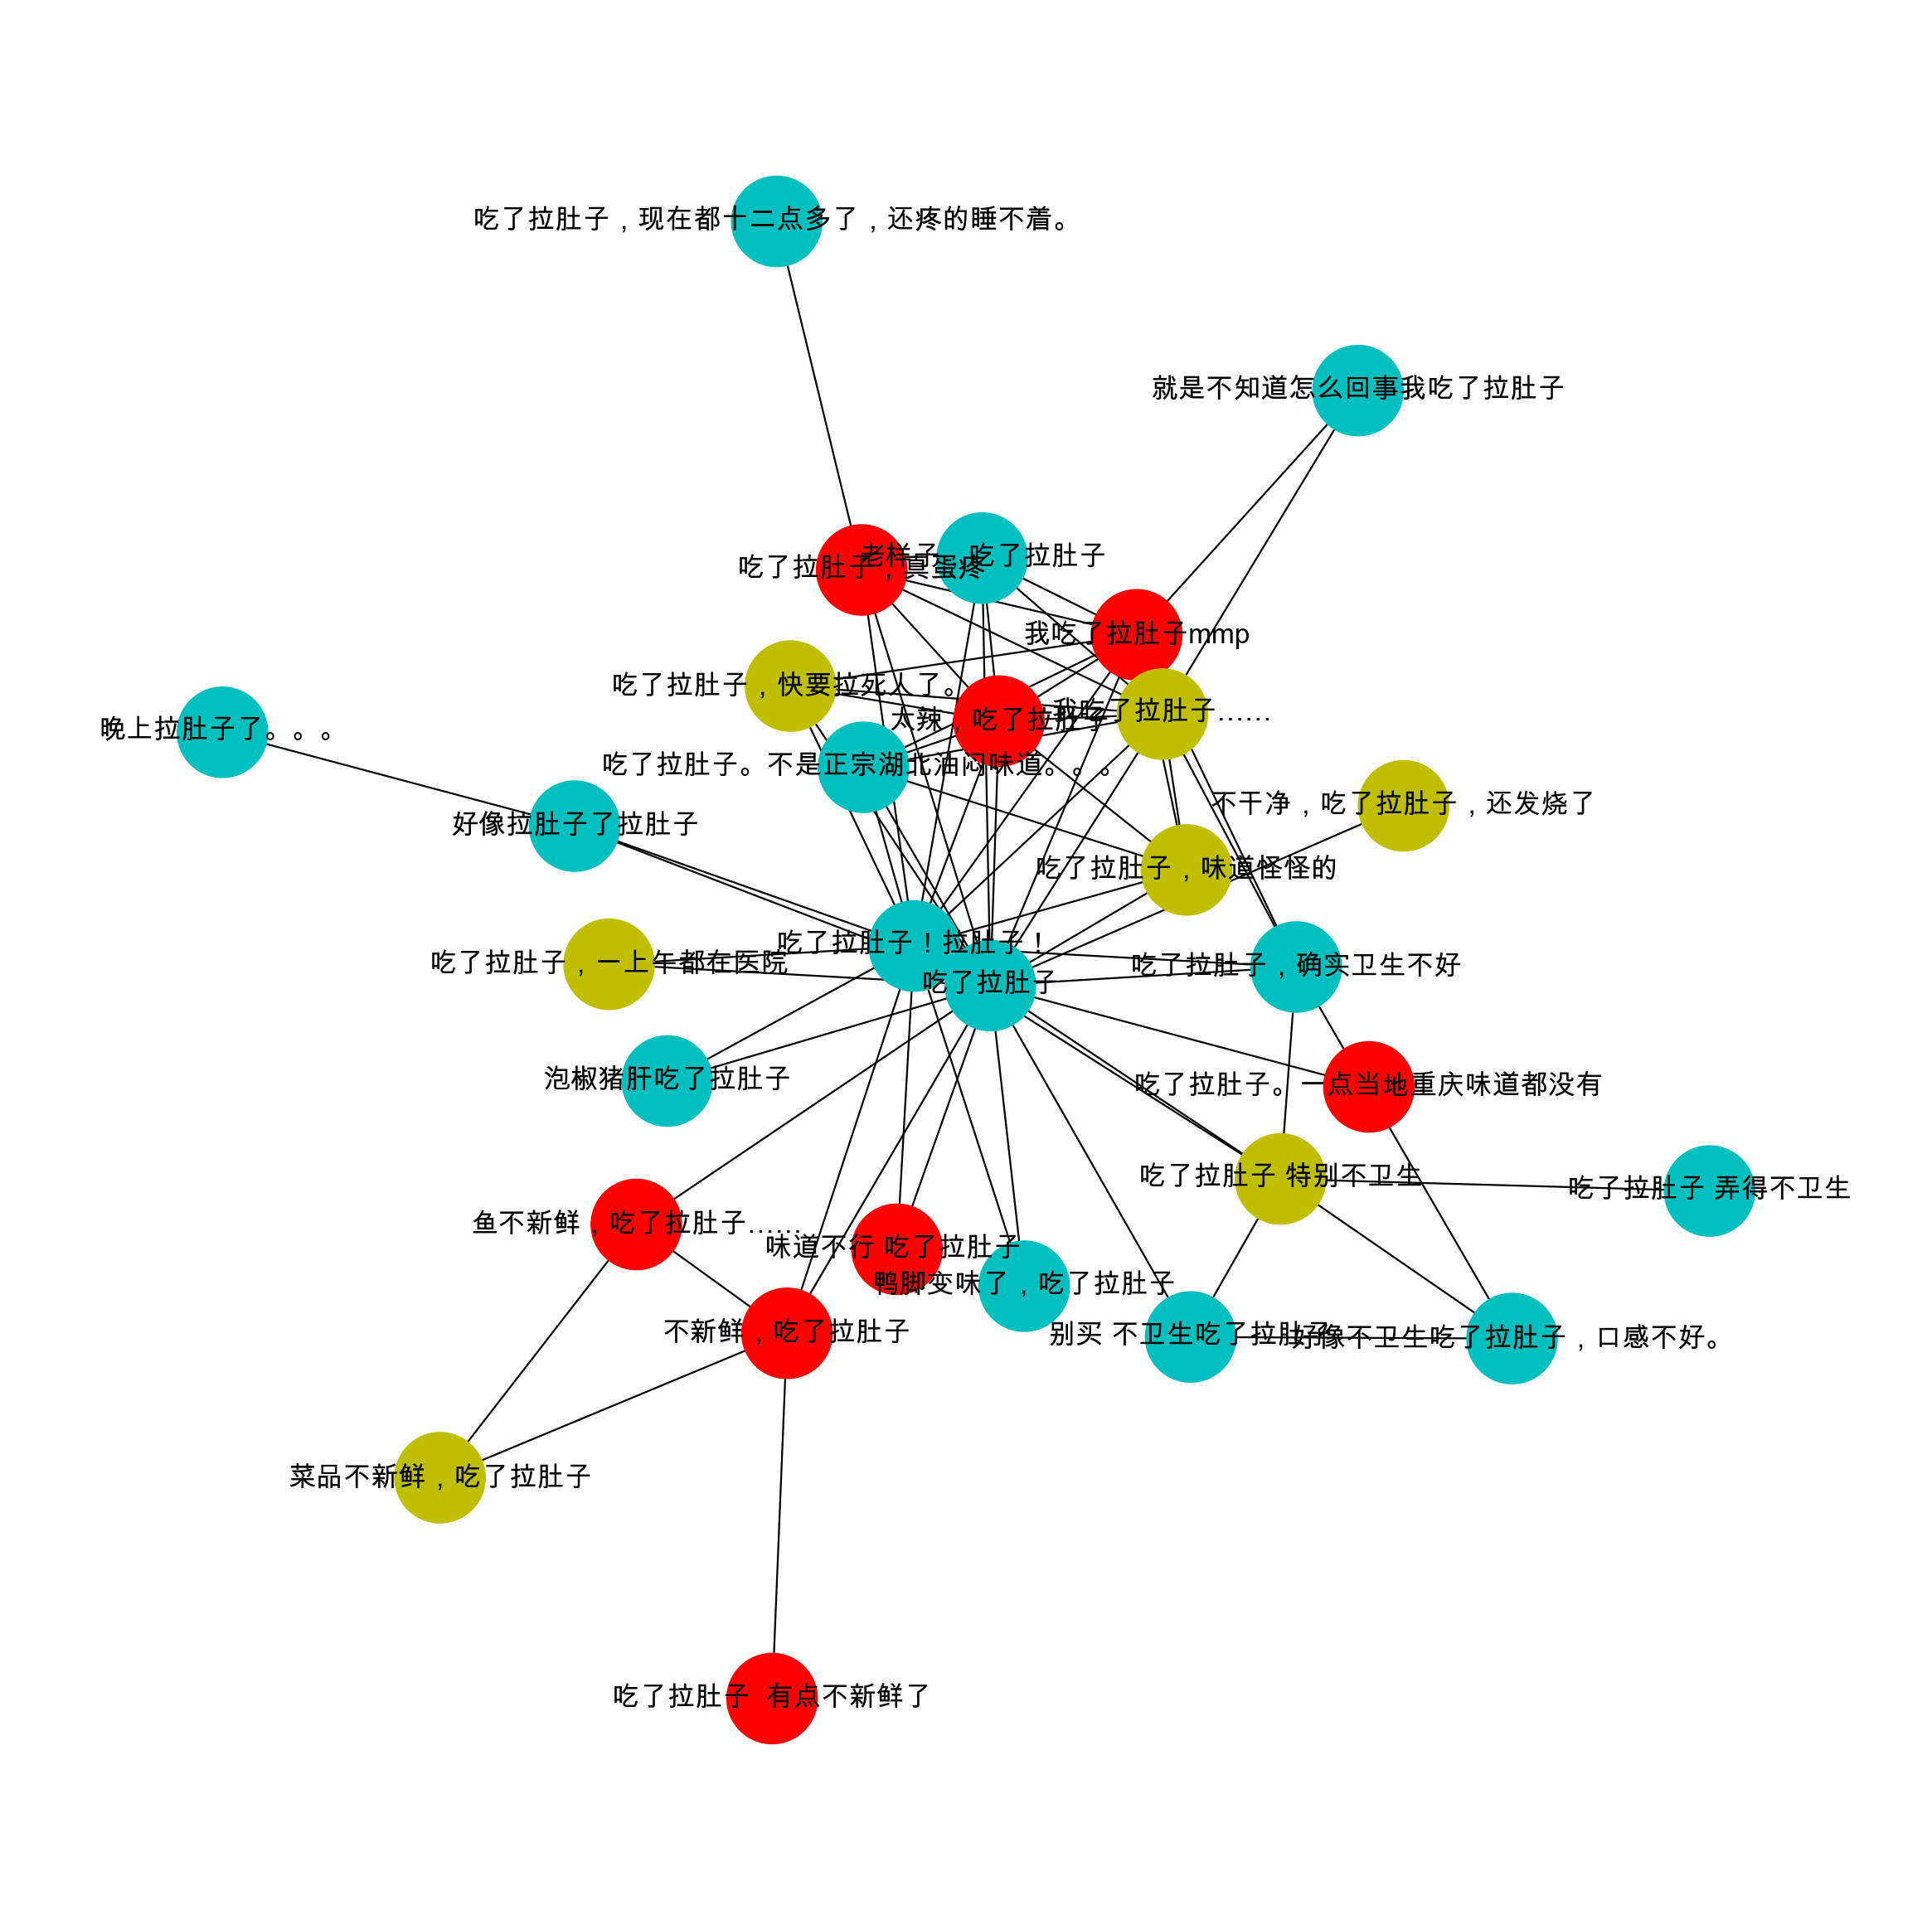

In [30]:
# 重新计算连通矩阵
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph

A = radius_neighbors_graph(
                     tfidf_group,
                     radius = 0.92,
                     mode ='connectivity', 
                     include_self=False       
                    )
                    
                    
# 文本网络的可视化 - kamada_kawai_layout
import networkx as nx
import matplotlib.pyplot as plt


# 矩阵格式转换成图格式
G = nx.from_numpy_matrix(A.toarray())

## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## 图像显示中文的问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 颜色设置
colors = ['r','c','y','c']*1000
#colors = ['#008B8B','r','b','orange','y','c','DeepPink','#838B8B','purple','olive','#A0CBE2','#4EEE94']*500
colors = colors[0:len(G.nodes())]

#使用kamada_kawai_layout布局
plt.figure(figsize=(3.5,3.5),dpi=400)
nx.draw_networkx(G,
                 pos = nx.kamada_kawai_layout(G),
                 node_color = colors,
                 labels = labels,
                 node_size = 80,
                 font_size = 3,
                 width=0.2,
                 alpha=1
                 )
plt.axis('off')  
plt.show()

        

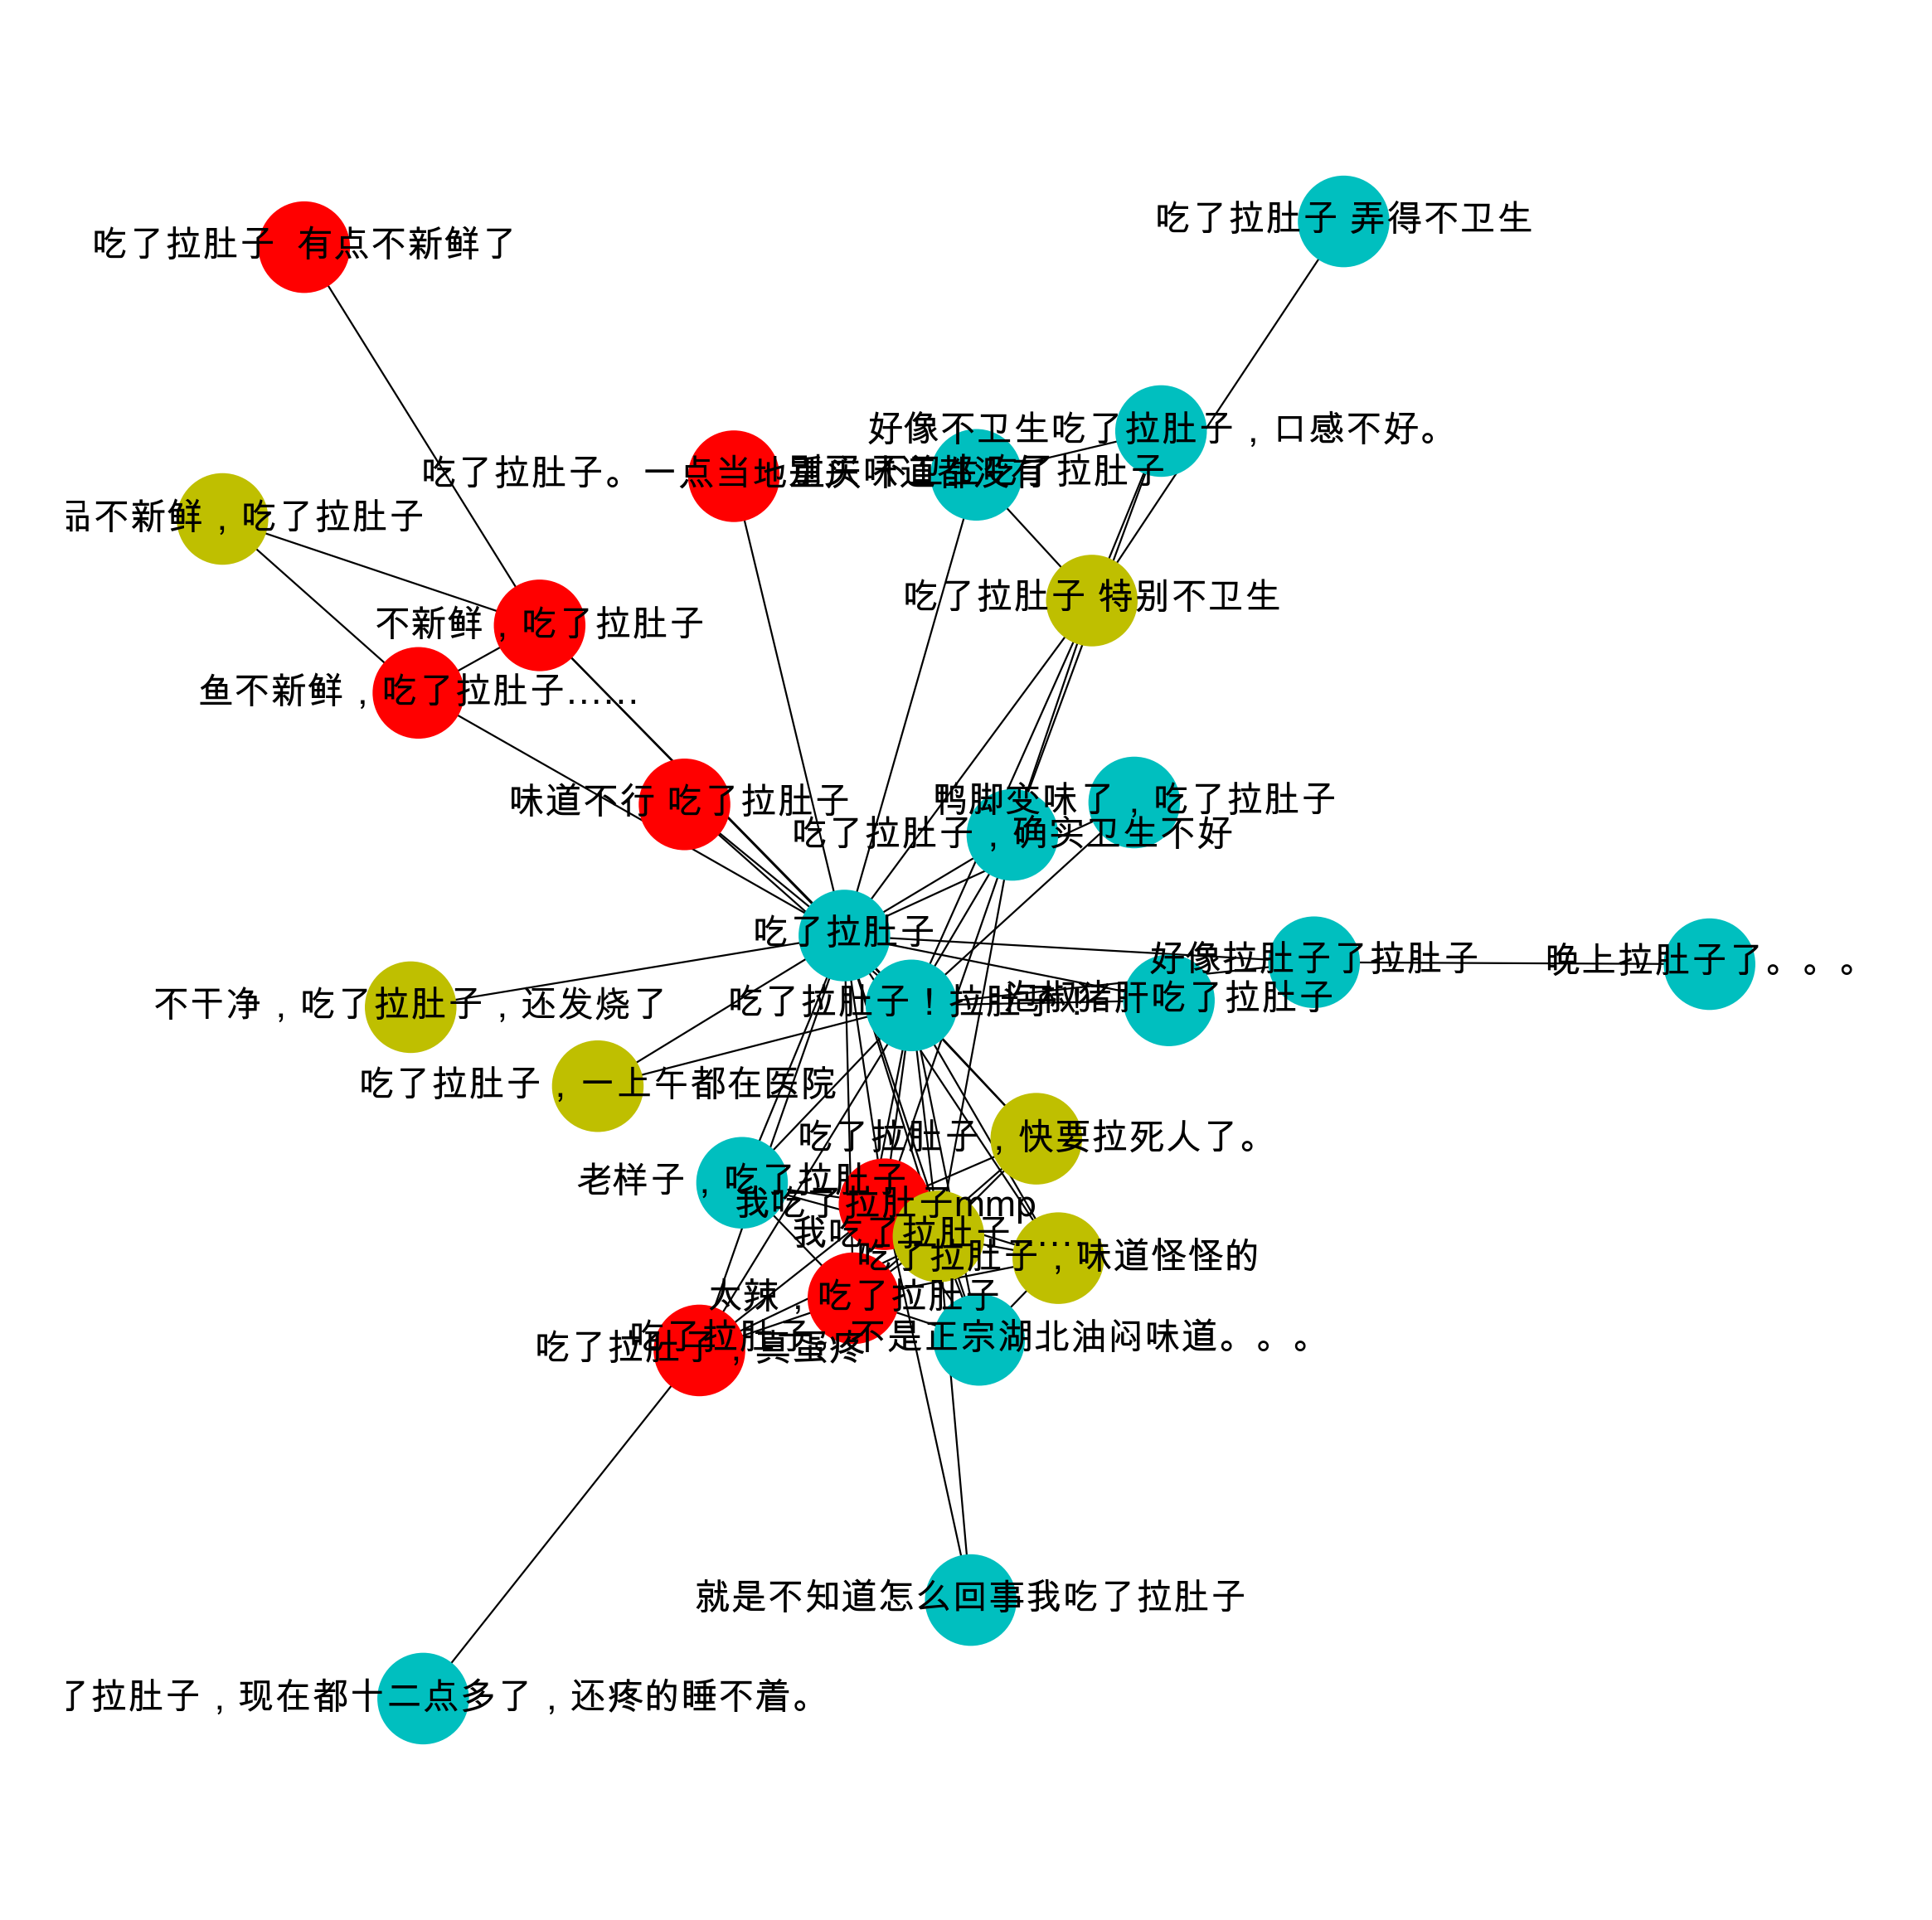

In [31]:


# 文本网络的可视化 -spring_layout
import networkx as nx
import matplotlib.pyplot as plt


# 矩阵格式转换成图格式
G = nx.from_numpy_matrix(A.toarray())

## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## 图像显示中文的问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 颜色设置
colors = ['r','c','y','c']*1000
#colors = ['#008B8B','r','b','orange','y','c','DeepPink','#838B8B','purple','olive','#A0CBE2','#4EEE94']*500
colors = colors[0:len(G.nodes())]

#使用kamada_kawai_layout布局
plt.figure(figsize=(3.5,3.5),dpi=400)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 labels = labels,
                 node_size = 80,
                 font_size = 4,
                 width=0.2,
                 alpha=1
                 )
plt.axis('off')  
plt.show()      